In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   49G   65G  43% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G   76K  6.4G   1% /var/colab
/dev/sda1        92G   68G   24G  75% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!rm -rf /path/to/unwanted/file_or_directory

In [ ]:
!rm -rf ~/.cache

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Provide the correct file path
file_path = '/content/drive/MyDrive/fashion/styles.csv'

# Load the dataset from Google Drive
styles_df = pd.read_csv(file_path, on_bad_lines='skip')

# **Data Overview:**

In [ ]:
# Display the first few rows
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
# Assuming 'df' is your DataFrame
print("Shape of the dataset:", styles_df.shape)

Shape of the dataset: (44424, 10)


In [ ]:
# Separate numerical and categorical columns
numerical_vars = styles_df.select_dtypes(include=['number']).columns
categorical_vars = styles_df.select_dtypes(include=['object', 'category']).columns

# Print the results
print("Numerical variables:", numerical_vars)
print("Numerical variables:")
print(styles_df[numerical_vars].head())
print("Categorical variables:", categorical_vars)
print("\nCategorical variables:")
print(styles_df[categorical_vars].head())

Numerical variables: Index(['id', 'year'], dtype='object')
Numerical variables:
      id    year
0  15970  2011.0
1  39386  2012.0
2  59263  2016.0
3  21379  2011.0
4  53759  2012.0
Categorical variables: Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage', 'productDisplayName'],
      dtype='object')

Categorical variables:
  gender masterCategory subCategory  articleType baseColour  season   usage  \
0    Men        Apparel     Topwear       Shirts  Navy Blue    Fall  Casual   
1    Men        Apparel  Bottomwear        Jeans       Blue  Summer  Casual   
2  Women    Accessories     Watches      Watches     Silver  Winter  Casual   
3    Men        Apparel  Bottomwear  Track Pants      Black    Fall  Casual   
4    Men        Apparel     Topwear      Tshirts       Grey  Summer  Casual   

                              productDisplayName  
0               Turtle Check Men Navy Blue Shirt  
1             Peter England Men Party Blue J

In [ ]:
# Check the structure of the styles dataset
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


## **Missing values and duplicates :**

In [ ]:
# Check for missing values in the styles dataset
styles_df.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,15
season,21
year,1
usage,317
productDisplayName,7


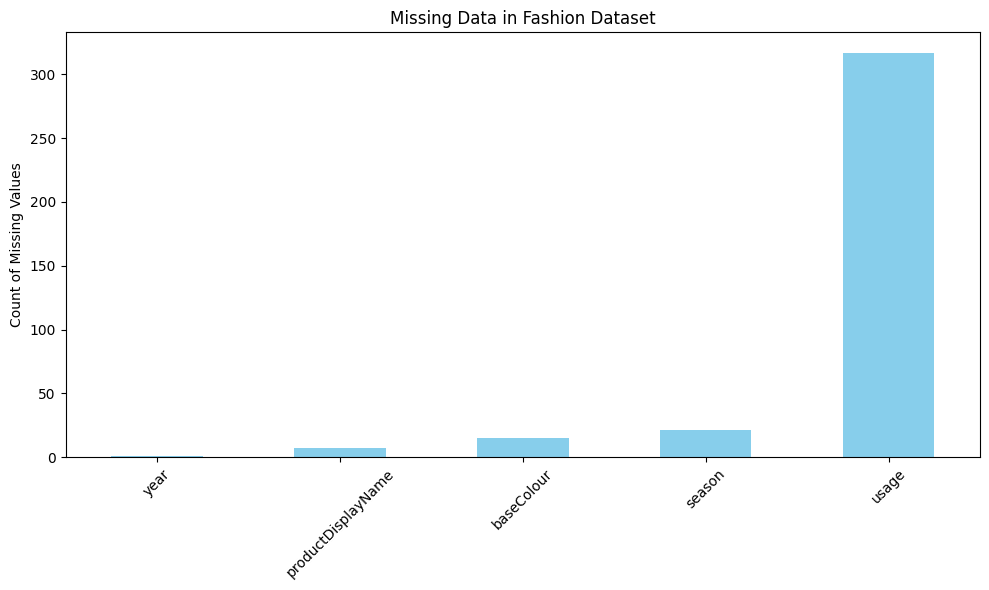

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing data
missing_data = styles_df.isnull().sum()

# Plotting missing data as a bar chart
plt.figure(figsize=(10, 6))
missing_data[missing_data > 0].sort_values().plot(kind='bar', color='skyblue')
plt.title('Missing Data in Fashion Dataset')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Check for duplicates in the dataset
duplicates = styles_df.duplicated().sum()

# Display the number of duplicate rows if any
duplicates

0

In [ ]:
# Check the unique values in categorical columns for styles dataset
styles_df.select_dtypes(include=['object']).nunique()

,0
gender,5
masterCategory,7
subCategory,45
articleType,143
baseColour,46
season,4
usage,8
productDisplayName,31121


In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the pre-trained spaCy model for NER
nlp = spacy.load('en_core_web_sm')  # This model includes NER functionality

# Define a list of common non-brand terms to remove
common_non_brands = ['Men', 'Women', 'Shirt', 'T-shirt', 'Jeans', 'Dress', 'Topwear', 'Bottomwear', 'Shoes', 'Jacket', 'Sweater', 'Pants', 'Blouse', 'Skirt', 'Shorts', 'Watch', 'Belt', 'Slippers']

# Define the function to extract brands using AI-based NER and cleaning
def ai_extract_brand_cleaned(product_name):
    # Ensure the input is a string
    if not isinstance(product_name, str):
        return "Unknown"

    # Process the product name with the spaCy NLP pipeline
    doc = nlp(product_name)

    # Extract entities labeled as organizations (brands are often labeled as ORG)
    brands = [ent.text for ent in doc.ents if ent.label_ == 'ORG']

    # If a brand is found, clean it by removing common non-brand terms
    if brands:
        brand = brands[0]
        # Remove common non-brand words
        cleaned_brand = ' '.join([word for word in brand.split() if word not in common_non_brands])
        return cleaned_brand

    # If no brand is found, return "Unknown"
    return "Unknown"

# Apply the AI-based extraction function to the 'productDisplayName' column
styles_df['Brand'] = styles_df['productDisplayName'].apply(ai_extract_brand_cleaned)

# Display the updated dataset with the 'Brand' column
styles_df[['productDisplayName', 'Brand']].head(20)


,productDisplayName,Brand
0,Turtle Check Men Navy Blue Shirt,Turtle Check Navy Blue
1,Peter England Men Party Blue Jeans,Peter England Party Blue
2,Titan Women Silver Watch,Unknown
3,Manchester United Men Solid Black Track Pants,Manchester United
4,Puma Men Grey T-shirt,Unknown
5,Inkfruit Mens Chain Reaction T-shirt,Unknown
6,Fabindia Men Striped Green Shirt,Unknown
7,Jealous 21 Women Purple Shirt,Unknown
8,Puma Men Pack of 3 Socks,Unknown
9,Skagen Men Black Watch,Skagen Black


In [ ]:
def extract_Brand(product_name):
    # Handle missing or non-string values
    if not isinstance(product_name, str):
        return "Unknown"  # Or you can return NaN or other value that suits your case

    # Special case for "Jealous" with a number (e.g., "Jealous 21")
    if product_name.startswith('Jealous'):
        words = product_name.split()
        if len(words) > 1 and words[1].isdigit():
            return ' '.join(words[:2])  # "Jealous 21"

    # Handling cases like "David Beckham Signature"
    # If the first and second words are common names (i.e., two words), extract them
    common_names = ['David', 'Beckham']  # Add other known names if needed
    words = product_name.split()
    if len(words) > 1 and words[1] in common_names:
        return ' '.join(words[:3])  # Capture the first two words ("David Beckham")

    # General case: just return the first word as the marque
    return words[0]

# Apply the function to the 'productDisplayName' column
styles_df['Brand'] = styles_df['productDisplayName'].apply(extract_Brand)

# Check the resulting dataset
print(styles_df[['productDisplayName', 'Brand']].head())


                              productDisplayName       Brand
0               Turtle Check Men Navy Blue Shirt      Turtle
1             Peter England Men Party Blue Jeans       Peter
2                       Titan Women Silver Watch       Titan
3  Manchester United Men Solid Black Track Pants  Manchester
4                          Puma Men Grey T-shirt        Puma


In [ ]:
# Display unique values in the 'marque' column
unique_Brands = styles_df['Brand'].unique()

# Show the unique values
print(unique_Brands)


['Turtle Check Navy Blue' 'Peter England Party Blue' 'Unknown' ...
 'Flying Machine Beige Casual' 'Leonard White Black Shoe'
 'Rocia Maroon & Black Sandals']


<ipython-input-16-671a219e3b58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=styles_df, x='gender', order=styles_df['gender'].value_counts().index, palette='coolwarm')


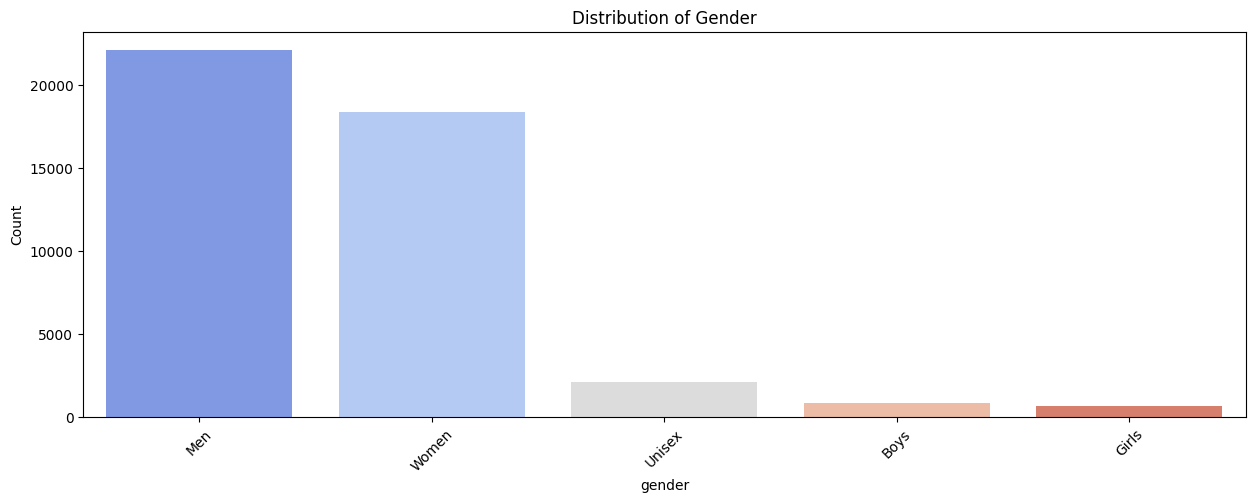

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution for 'gender' column with custom colors
plt.figure(figsize=(15, 5))
sns.countplot(data=styles_df, x='gender', order=styles_df['gender'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Gender')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.ylabel('Count')
plt.show()


# **Data Visualization:**

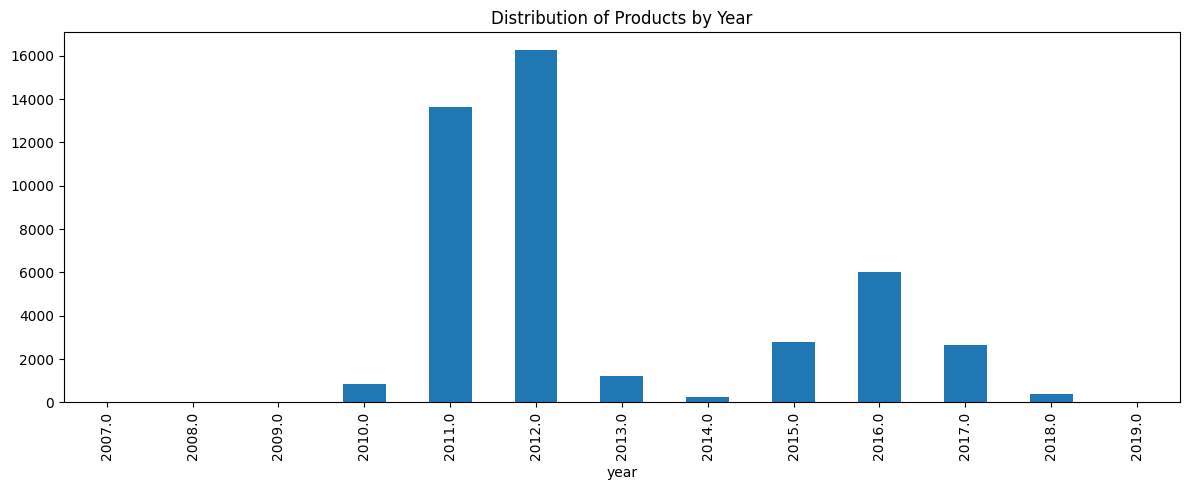

In [ ]:
# Year distribution
plt.figure(figsize=(12, 5))
styles_df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Products by Year')
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

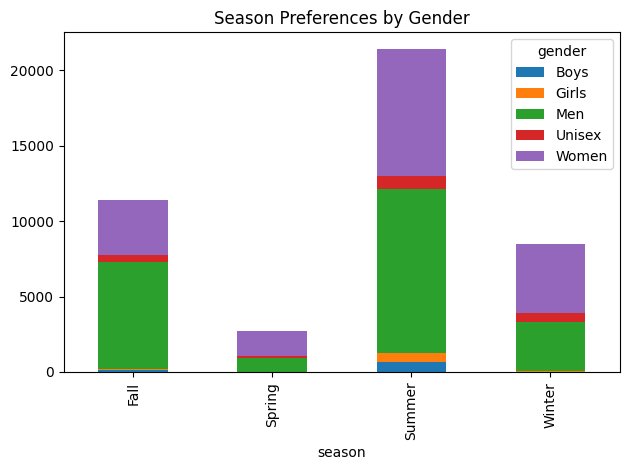

In [ ]:
# Season preferences by gender
plt.figure(figsize=(12, 6))
season_gender = pd.crosstab(styles_df['season'], styles_df['gender'])
season_gender.plot(kind='bar', stacked=True)
plt.title('Season Preferences by Gender')
plt.tight_layout()

<Figure size 1400x800 with 0 Axes>

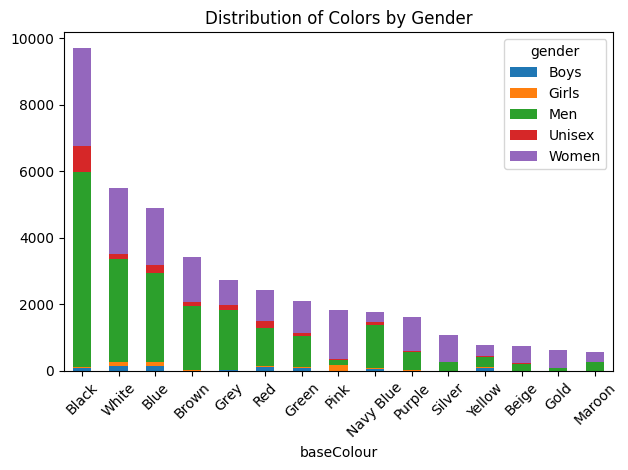

In [ ]:
# Distribution of colors by gender
plt.figure(figsize=(14, 8))
color_gender = pd.crosstab(styles_df['baseColour'], styles_df['gender'])
# Display only top 15 colors
color_gender = color_gender.loc[color_gender.sum(axis=1).sort_values(ascending=False).head(15).index]
color_gender.plot(kind='bar', stacked=True)
plt.title('Distribution of Colors by Gender')
plt.xticks(rotation=45)
plt.tight_layout()

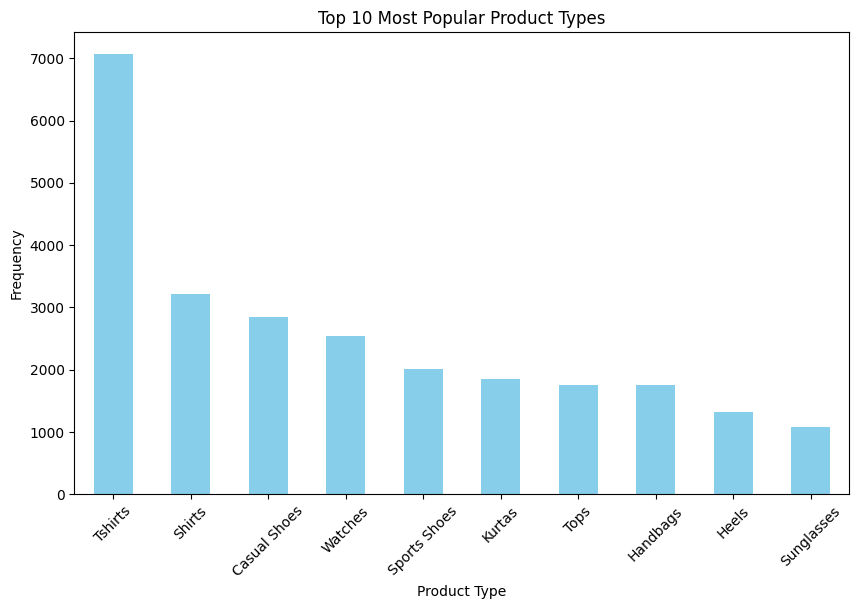

In [ ]:
import matplotlib.pyplot as plt

# Demand Analysis by Category
def demand_analysis(data):
    # Ensure the 'articleType' column exists
    if 'articleType' not in data.columns:
        print("The 'articleType' column is not in the dataset.")
        return

    # Get the top 10 most frequent product types
    top_10_article_types = data['articleType'].value_counts().head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_10_article_types.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Most Popular Product Types')
    plt.xlabel('Product Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

# Example usage (call the function with your data)
demand_analysis(styles_df)  # Replace 'styles_df' with your actual dataframe


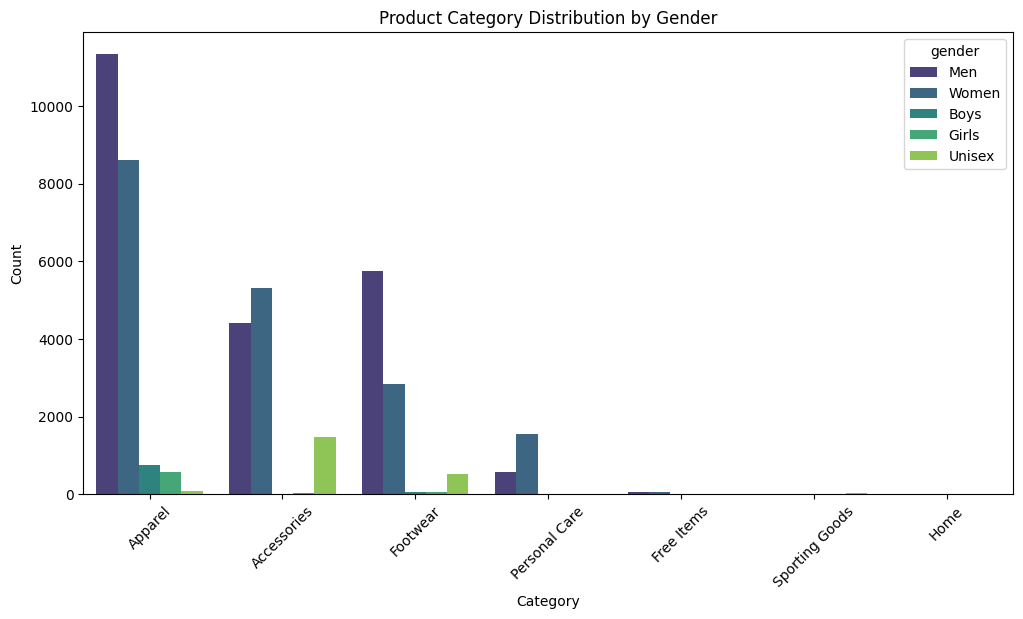

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example Segmentation Analysis function
def segmentation_analysis(data):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x='masterCategory', hue='gender', palette='viridis')
    plt.title('Product Category Distribution by Gender')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.show()

# Example usage (replace 'styles_df' with your actual dataset)
segmentation_analysis(styles_df)


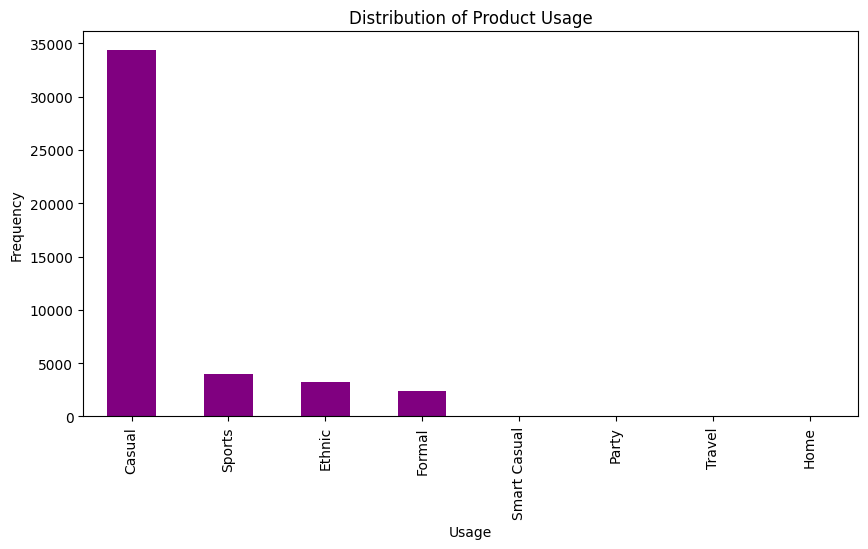

In [ ]:
usage_counts = styles_df['usage'].value_counts()
plt.figure(figsize=(10, 5))
usage_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Product Usage')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-5a4e22c3f725>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')


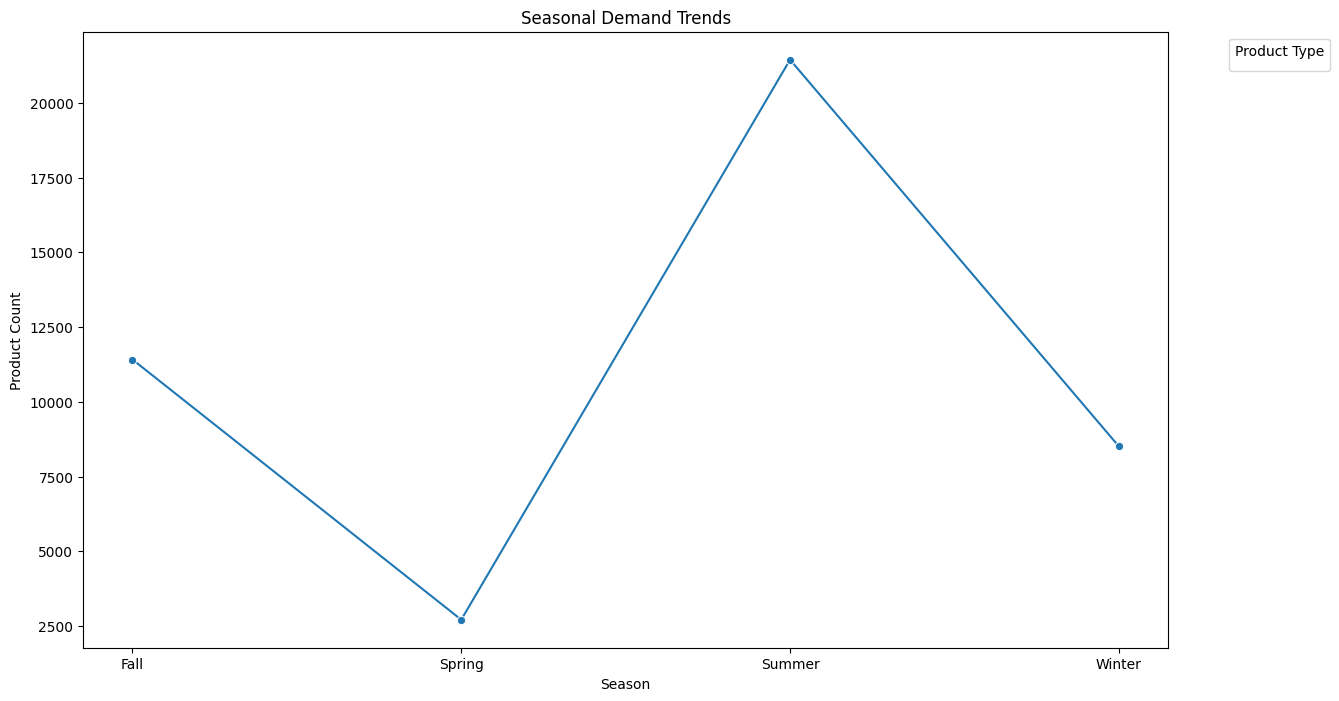

In [ ]:
# We can calculate the product demand trend for each season and identify any inventory spikes or drops
seasonal_trends = styles_df.groupby(['season']).size().reset_index(name='count')

# Seasonal trends plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=seasonal_trends, x='season', y='count', marker='o')
plt.title('Seasonal Demand Trends')
plt.xlabel('Season')
plt.ylabel('Product Count')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-25-0764659cd702>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_product_types = season_product_count.groupby('season').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


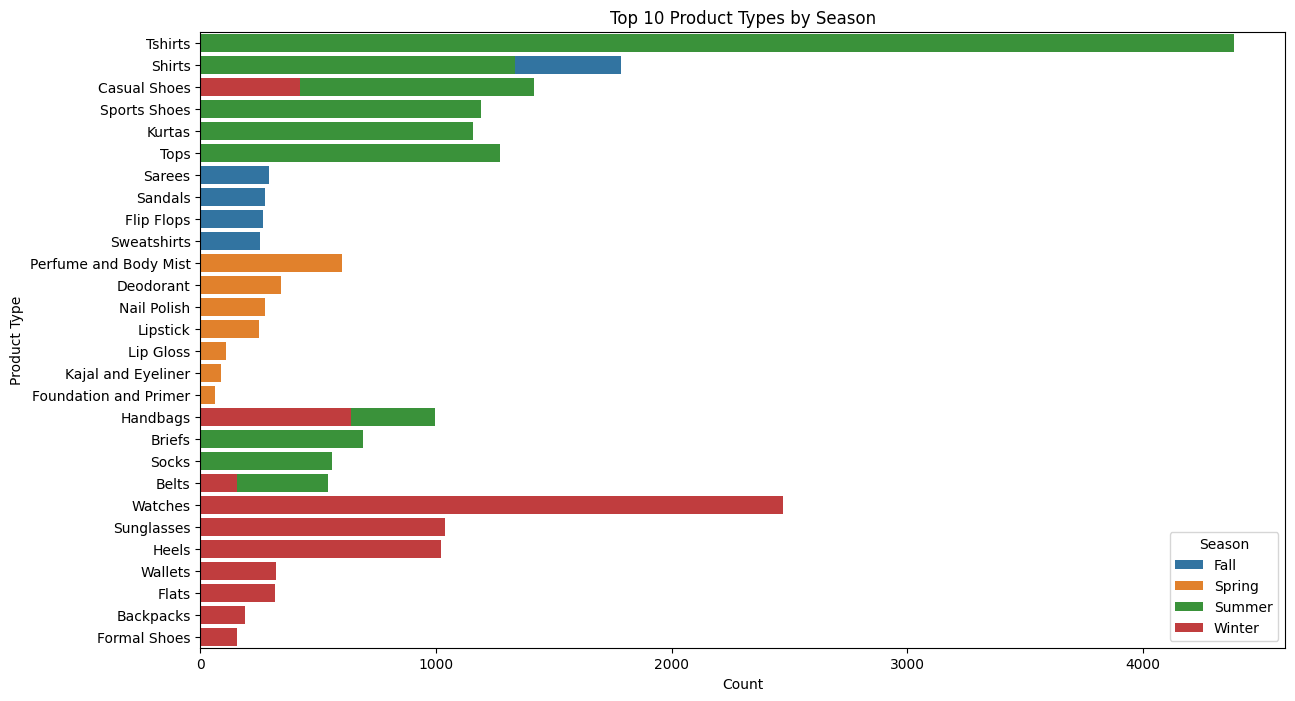

In [ ]:
# Group by season and product type to count occurrences
season_product_count = styles_df.groupby(['season', 'articleType']).size().reset_index(name='count')

# Get top 10 product types for each season
top_product_types = season_product_count.groupby('season').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_product_types, x='count', y='articleType', hue='season', dodge=False)
plt.title('Top 10 Product Types by Season')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.legend(title='Season')
plt.show()

<ipython-input-26-4f335dbd5e92>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_colors = season_color_count.groupby('season').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


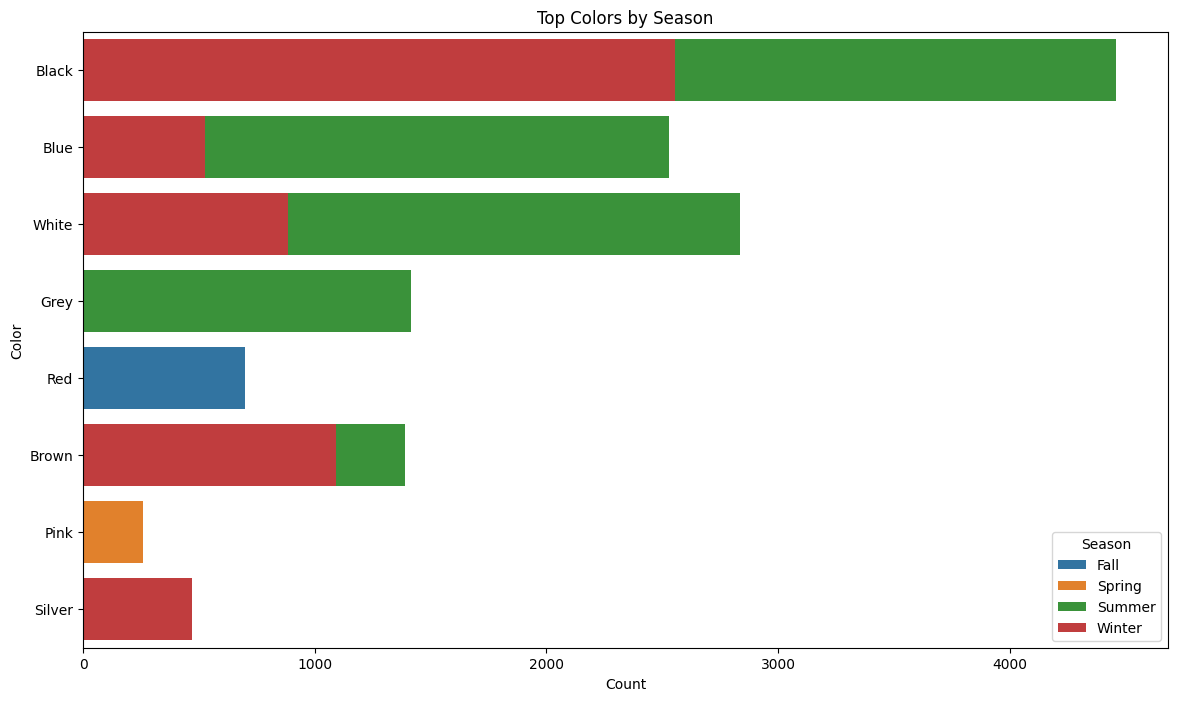

In [ ]:
# Group by season and color to count occurrences
season_color_count = styles_df.groupby(['season', 'baseColour']).size().reset_index(name='count')

# Get top colors for each season
top_colors = season_color_count.groupby('season').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_colors, x='count', y='baseColour', hue='season', dodge=False)
plt.title('Top Colors by Season')
plt.xlabel('Count')
plt.ylabel('Color')
plt.legend(title='Season')
plt.show()

<Figure size 1200x600 with 0 Axes>

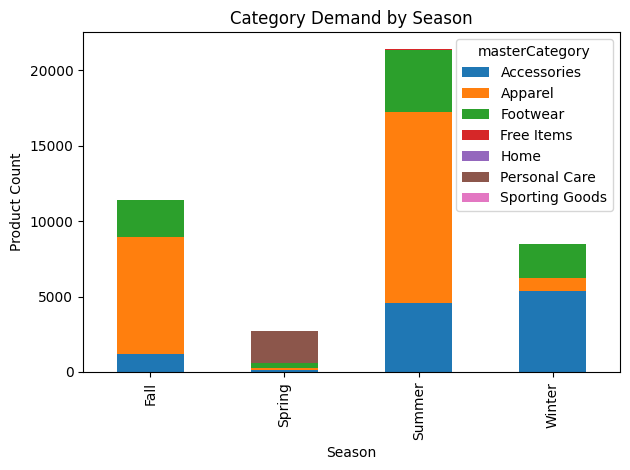

In [ ]:
# Group by season and masterCategory to get demand for each category
category_season_counts = styles_df.groupby(['season', 'masterCategory']).size().reset_index(name='count')

# Plotting the demand for each category by season using a stacked bar chart
plt.figure(figsize=(12, 6))
category_season_counts.pivot(index='season', columns='masterCategory', values='count').plot(kind='bar', stacked=True)
plt.title('Category Demand by Season')
plt.xlabel('Season')
plt.ylabel('Product Count')
plt.tight_layout()
plt.show()


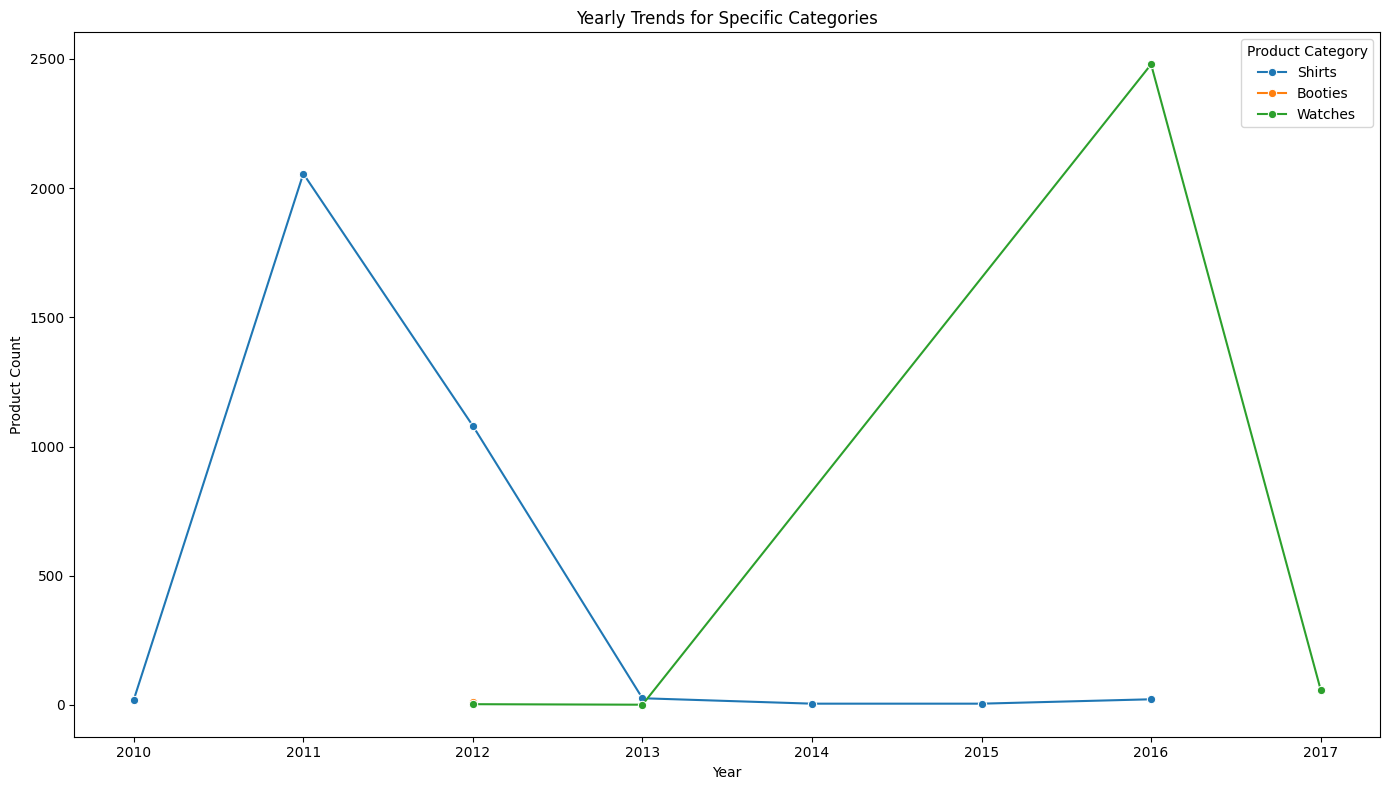

In [ ]:
# Filter the data for specific product categories (e.g., 'Shirts' and 'Watches')
category_trends = styles_df[styles_df['articleType'].isin(['Shirts', 'Watches'])]

# Group by year and articleType to analyze trends
category_year_trends = category_trends.groupby(['year', 'articleType']).size().reset_index(name='count')

# Plotting yearly trends for specific categories
plt.figure(figsize=(14, 8))
sns.lineplot(data=category_year_trends, x='year', y='count', hue='articleType', marker='o')
plt.title('Yearly Trends for Specific Categories')
plt.xlabel('Year')
plt.ylabel('Product Count')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


# **Data Preparation:**

In [ ]:
# Step 1: Drop missing values
styles_df = styles_df.dropna()

In [ ]:
print(styles_df.shape)

(44077, 10)


In [ ]:
# Print unique values in each column
for column in styles_df.columns:
    print(f"Unique values in '{column}':")
    print(styles_df[column].unique())
    print("\n")

Unique values in 'id':
[15970 39386 59263 ... 18842 46694 51623]


Unique values in 'gender':
['Men' 'Women' 'Boys' 'Girls' 'Unisex']


Unique values in 'masterCategory':
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']


Unique values in 'subCategory':
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']


Unique values in 'articleType':
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'S